# NORMAL TASK - CUSTOMER SEGMENTATION FOR PERSONALIZED MARKETING

**DATA PREPROCESSING**

   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3               

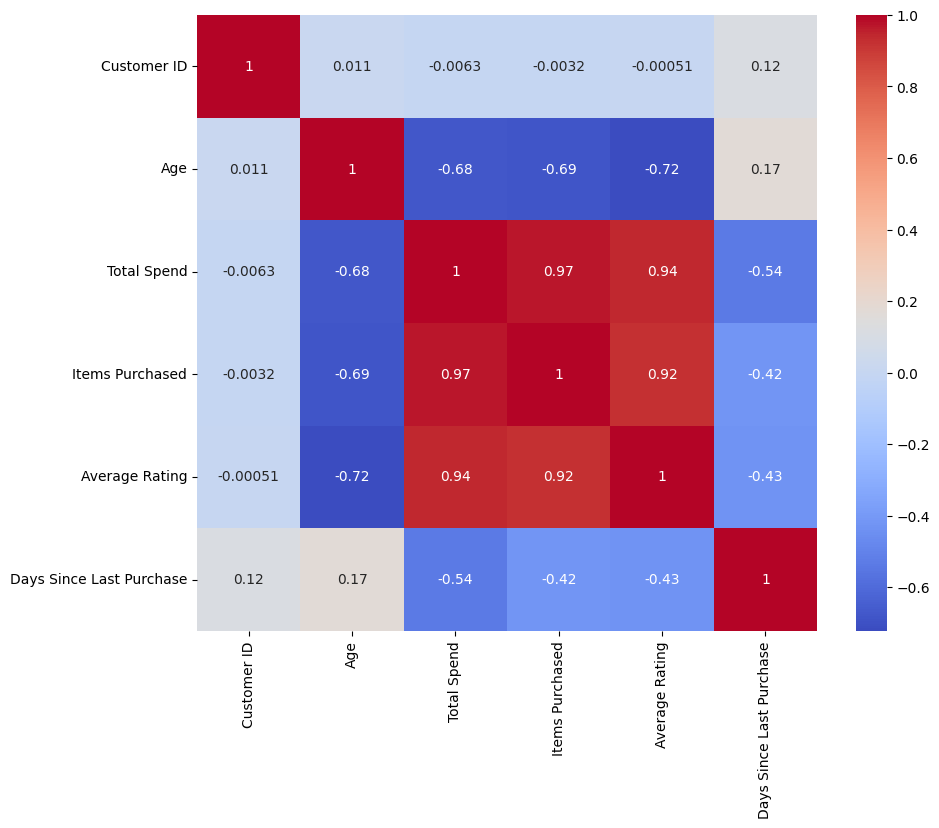

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and read the customer data
data = pd.read_csv('/kaggle/input/e-commerce-customer-behavior-dataset/E-commerce Customer Behavior - Sheet1.csv')
print(data.head())  # Display first few rows
print(data.info())  # Display data types and missing values
print(data.describe())

# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

**K-MEANS CLUSTERING**

Silhouette Score for 6 clusters: 0.6744


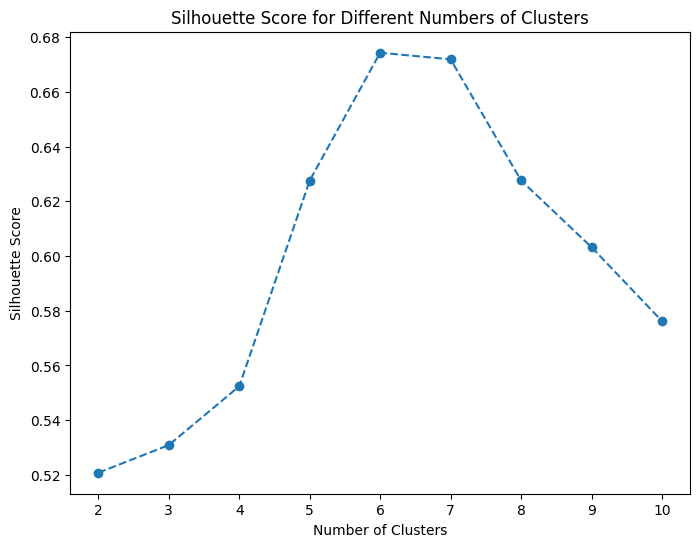

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming 'customer_data' is your DataFrame with the mentioned columns including the target variable 'Target'

# Separate features and target variable
features = ['Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
X = numeric_data[features]
y = numeric_data['Items Purchased']  # Replace 'Target' with the actual name of your target variable

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
for k in range(2, 11):  # Trying different numbers of clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_train)
    cluster_labels = kmeans.predict(X_train)
    silhouette_scores.append(silhouette_score(X_train, cluster_labels))

# Choosing the number of clusters based on the silhouette score
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 because the range starts from 2

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, n_init=10, random_state=42)
kmeans.fit(X_train)
train_cluster_labels = kmeans.labels_

# Predict clusters for test data
test_cluster_labels = kmeans.predict(X_test)

# Assigning cluster labels to the data
X_train_with_clusters = pd.DataFrame(X_train, columns=features)
X_train_with_clusters['Cluster'] = train_cluster_labels

X_test_with_clusters = pd.DataFrame(X_test, columns=features)
X_test_with_clusters['Cluster'] = test_cluster_labels

# Calculate silhouette score
silhouette_avg = silhouette_score(X_normalized, kmeans.predict(X_normalized))
print(f"Silhouette Score for {optimal_num_clusters} clusters: {silhouette_avg:.4f}")

# Plotting the silhouette scores
silhouette_scores = []
for k in range(2, 11):  # Trying different numbers of clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_normalized)
    cluster_labels = kmeans.predict(X_normalized)
    silhouette_avg = silhouette_score(X_normalized, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

****

**DECISION TREE**

Decision Tree Accuracy: 0.9714


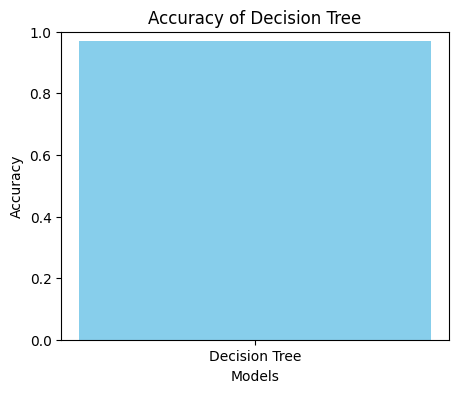

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming 'customer_data' has features and 'Target' is the target variable
features = ['Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
X = numeric_data[features]
y = numeric_data['Items Purchased']  # Replace 'Target' with the actual name of your target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

# Plotting Decision Tree Accuracy
plt.figure(figsize=(5, 4))
plt.bar(['Decision Tree'], [accuracy], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Decision Tree')
plt.ylim([0, 1])  # Set y-axis limits to 0-1 for accuracy
plt.show()

**RANDOM FOREST**

Random Forest Accuracy: 0.9714


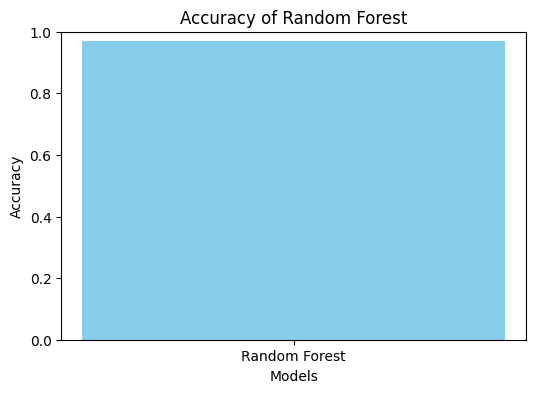

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming 'customer_data' has features and 'Target' is the target variable
features = ['Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
X = numeric_data[features]
y = numeric_data['Items Purchased']  # Replace 'Target' with the actual name of your target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Fit the model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Plotting Random Forest Accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Random Forest'], [accuracy], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Random Forest')
plt.ylim([0, 1])  # Set y-axis limits to 0-1 for accuracy
plt.show()

**SUPPORT VECTOR MACHINE**

SVM Accuracy: 0.2857


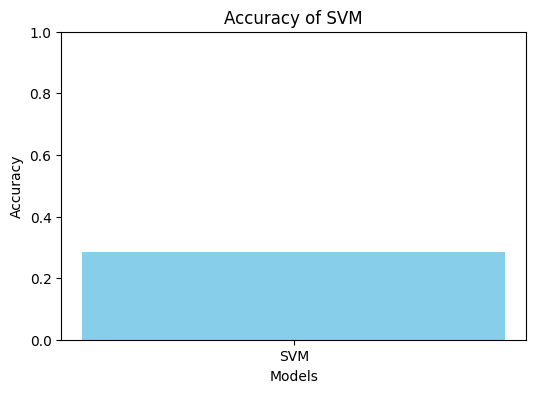

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming 'customer_data' has features and 'Target' is the target variable
features = ['Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
X = numeric_data[features]
y = numeric_data['Items Purchased']  # Replace 'Target' with the actual name of your target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM Classifier
svm_classifier = SVC(random_state=42)

# Fit the model
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.4f}")

# Plotting SVM Accuracy
plt.figure(figsize=(6, 4))
plt.bar(['SVM'], [accuracy], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of SVM')
plt.ylim([0, 1])  # Set y-axis limits to 0-1 for accuracy
plt.show()